<a href="https://colab.research.google.com/github/Tuval198/Blood-Pressure-Estimation-with-a-Smartwatch/blob/main/mimic3download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wfdb

     |████████████████████████████████| 143kB 7.6MB/s 


In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import pandas as pd

import wfdb

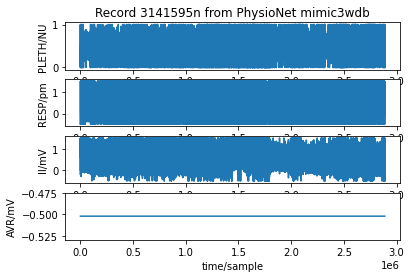

{'adc_gain': [1023.0, 515.0, 510.0, 510.0],
 'adc_res': [10, 10, 10, 10],
 'adc_zero': [512, 512, 512, 512],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 51, 840000),
 'baseline': [0, 254, 256, 256],
 'block_size': [0, 0, 0, 0],
 'byte_offset': [None, None, None, None],
 'checksum': [-12412, 19668, 13968, 0],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat',
  '3141595_0001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'fs': 125,
 'init_value': [470, 0, 565, 0],
 'n_sig': 4,
 'p_signal': array([[ 0.45943304, -0.49320388,  0.60588235, -0.50196078],
        [ 0.45356794, -0.49320388,  0.62941176, -0.50196078],
        [ 0.44965787, -0.49320388,  0.62941176, -0.50196078],
        ...,
        [ 0.79472141,  0.        , -0.50196078, -0.50196078],
        [ 0.79081134,  0.        , -0.50196078, -0.50196078],
        [ 0.78690127,  0. 

2888500

In [ ]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
# Can also read the same files hosted on PhysioNet https://physionet.org/content/mimic3wdb/31/3141595/
# in the /training/ database subdirectory.
record = wfdb.rdrecord('3141595_0001', pn_dir='mimic3wdb/31/3141595/')
wfdb.plot_wfdb(record=record, title='Record 3141595n from PhysioNet mimic3wdb') 
display(record.__dict__)
display(len(record.__dict__['p_signal']))

In [ ]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
# Can also read the same files hosted on Physionet
signals, fields = wfdb.rdsamp('3141595_0001', pn_dir='mimic3wdb/31/3141595/')
display(signals)
display(fields)
record_dict = record.__dict__
display(record_dict['sig_name'])

array([[ 0.45943304, -0.49320388,  0.60588235, -0.50196078],
       [ 0.45356794, -0.49320388,  0.62941176, -0.50196078],
       [ 0.44965787, -0.49320388,  0.62941176, -0.50196078],
       ...,
       [ 0.79472141,  0.        , -0.50196078, -0.50196078],
       [ 0.79081134,  0.        , -0.50196078, -0.50196078],
       [ 0.78690127,  0.        , -0.50196078, -0.50196078]])

{'base_date': None,
 'base_time': datetime.time(10, 2, 51, 840000),
 'comments': [],
 'fs': 125,
 'n_sig': 4,
 'sig_len': 2888500,
 'sig_name': ['PLETH', 'RESP', 'II', 'AVR'],
 'units': ['NU', 'pm', 'mV', 'mV']}

['PLETH', 'RESP', 'II', 'AVR']

In [ ]:
df = pd.DataFrame(signals)
print(df)

             0      1   2   3   4   5     6     7
0        142.0  145.0 NaN NaN NaN NaN  49.0  95.0
1        142.0  145.0 NaN NaN NaN NaN  43.0  95.0
2        143.0  145.0 NaN NaN NaN NaN  43.0  95.0
3        144.0  145.0 NaN NaN NaN NaN  40.0  95.0
4        144.0  145.0 NaN NaN NaN NaN  40.0  96.0
...        ...    ...  ..  ..  ..  ..   ...   ...
1938725  155.0  155.0 NaN NaN NaN NaN  28.0  92.0
1938726  155.0  155.0 NaN NaN NaN NaN  27.0  92.0
1938727  155.0  155.0 NaN NaN NaN NaN  26.0  92.0
1938728  155.0  155.0 NaN NaN NaN NaN  30.0  92.0
1938729  155.0  155.0 NaN NaN NaN NaN  30.0  92.0

[1938730 rows x 8 columns]


In [ ]:
record = wfdb.rdrecord('3141595n', pn_dir='mimic3wdb/31/3141595/')
display(record.__dict__)
display(len(record.__dict__['p_signal']))

{'adc_gain': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'adc_res': [16, 16, 16, 16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': datetime.time(10, 2, 52),
 'baseline': [0, 0, 0, 0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None, None, None, None],
 'checksum': [29726, -25932, 8715, -14954, -26331, -11099, 6171, 29829],
 'comments': ['Location: nicu'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat',
  '3141595n.dat'],
 'fmt': ['16', '16', '16', '16', '16', '16', '16', '16'],
 'fs': 1,
 'init_value': [142, 145, -32768, -32768, -32768, -32768, 49, 95],
 'n_sig': 8,
 'p_signal': array([[142., 145.,  nan, ...,  nan,  49.,  95.],
        [142., 145.,  nan, ...,  nan,  43.,  95.],
        [143., 145., 

1938730